In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

RESULT_DIR = '../result/'

def safe_read_csv(path):
    if not os.path.exists(path):
        print(f"파일이 존재하지 않습니다: {path}")
        return None
    return pd.read_csv(path)

def load_graph_results(prefix, result_dir=RESULT_DIR):
    nodes = safe_read_csv(os.path.join(result_dir, f"{prefix}_nodes.csv"))
    edges = safe_read_csv(os.path.join(result_dir, f"{prefix}_edges.csv"))
    return nodes, edges

lp_nodes, lp_edges = load_graph_results('lp')
lv_nodes, lv_edges = load_graph_results('lv')
gcn_nodes, gcn_edges = load_graph_results('gcn')
adaptive_lp_nodes, adaptive_lp_edges = load_graph_results('adaptive_lp')

In [ ]:
def plot_graph(nodes, edges, title, edge_alpha=0.002, node_size=0.5, xlim=None, ylim=None):
    import matplotlib.colors as mcolors
    import numpy as np
    G = nx.Graph()
    for _, row in nodes.iterrows():
        # cluster_label, cluster_labels, community_label 등 다양한 컬럼명 지원
        label = (
            row['cluster_label'] if 'cluster_label' in row
            else row['cluster_labels'] if 'cluster_labels' in row
            else row['community_label'] if 'community_label' in row
            else None
        )
        G.add_node(row['node_id'], label=label, pos=(row['longitude'], row['latitude']))
    for _, row in edges.iterrows():
        G.add_edge(row['source'], row['target'])
    labels = nx.get_node_attributes(G, 'label')
    unique_labels = sorted(set(labels.values()))
    n_labels = len(unique_labels)
    # 컬러맵을 라벨 개수에 맞게 샘플링 (n_labels가 많아도 색이 반복되지 않게)
    if n_labels <= 20:
        cmap = plt.get_cmap('hsv')
    elif n_labels <= 256:
        cmap = plt.get_cmap('rainbow', n_labels)
    else:
        cmap = plt.get_cmap('tab20', n_labels)
    color_map = {label: cmap(i % cmap.N) for i, label in enumerate(unique_labels)}
    node_colors = [color_map[labels[n]] for n in G.nodes()]
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(8, 4))
    nx.draw_networkx_edges(G, pos, alpha=edge_alpha)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    # 눈금 표시
    plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    # n_labels 정보 구석에 출력
    # plt.text(0.99, 0.01, f'#labels: {n_labels}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

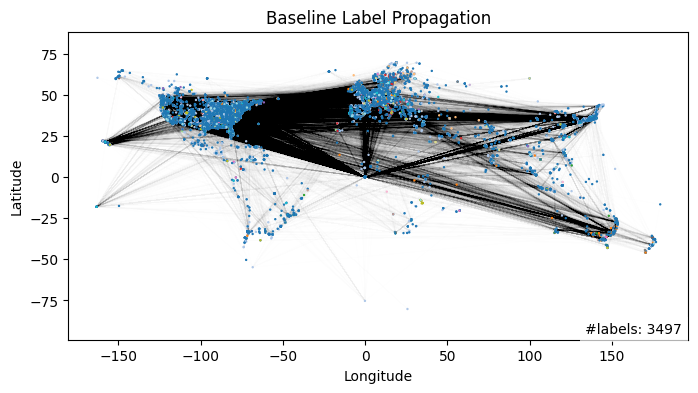

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


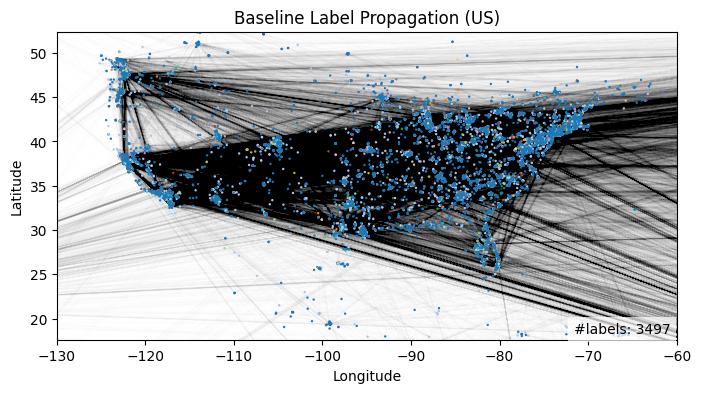

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


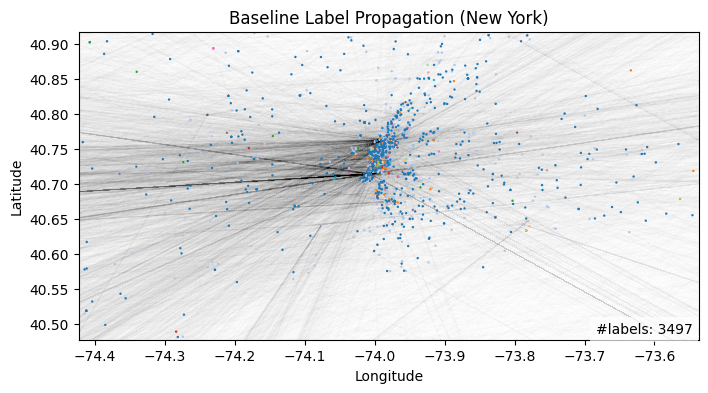

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


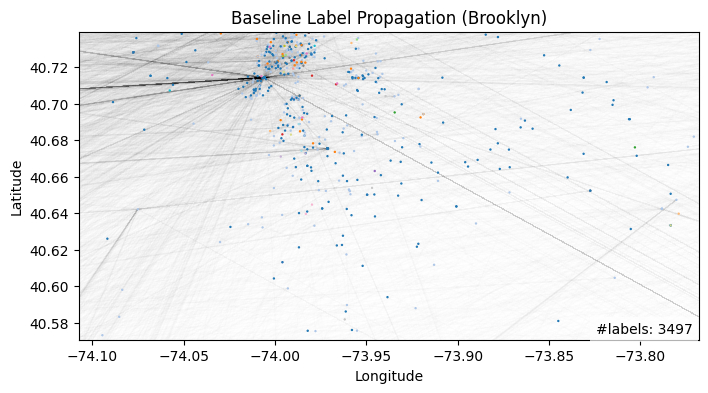

In [19]:
plot_graph(lp_nodes, lp_edges, 'Baseline Label Propagation')
plot_graph(lp_nodes, lp_edges, 'Baseline Label Propagation (US)', xlim=(-130, -60), ylim=(20, 50))
plot_graph(lp_nodes, lp_edges, 'Baseline Label Propagation (New York)', xlim=(-74.2591, -73.7004), ylim=(40.4774, 40.9176))
plot_graph(lp_nodes, lp_edges, 'Baseline Label Propagation (Brooklyn)', xlim=(-74.0419, -73.8334), ylim=(40.5707, 40.7394))

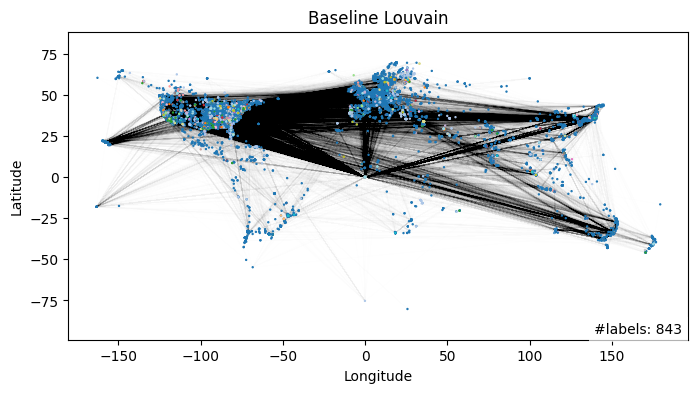

In [ ]:
plot_graph(lv_nodes, lv_edges, 'Baseline Louvain')
plot_graph(lv_nodes, lv_edges, 'Baseline Louvain (US)', xlim=(-130, -60), ylim=(20, 50))
plot_graph(lv_nodes, lv_edges, 'Baseline Louvain (New York)', xlim=(-74.2591, -73.7004), ylim=(40.4774, 40.9176))
plot_graph(lv_nodes, lv_edges, 'Baseline Louvain (Brooklyn)', xlim=(-74.0419, -73.8334), ylim=(40.5707, 40.7394))

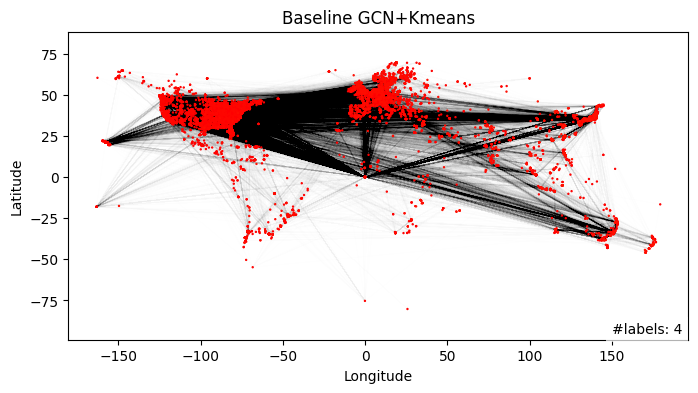

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


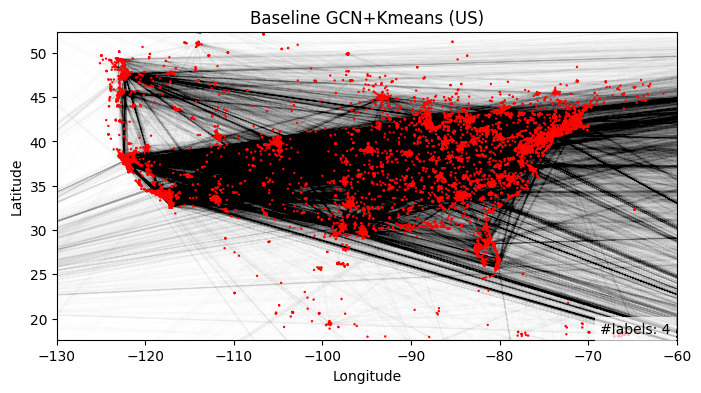

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


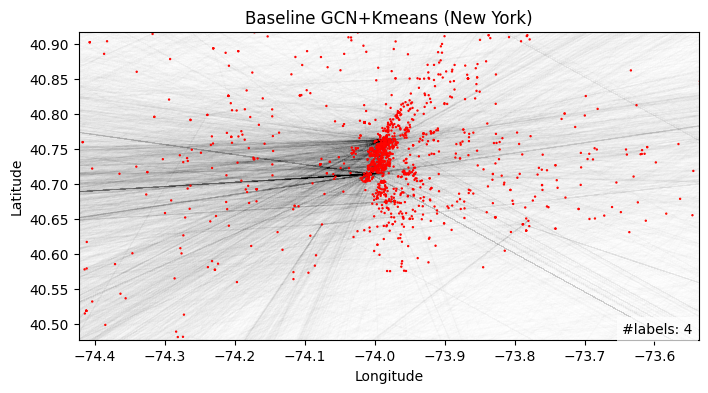

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


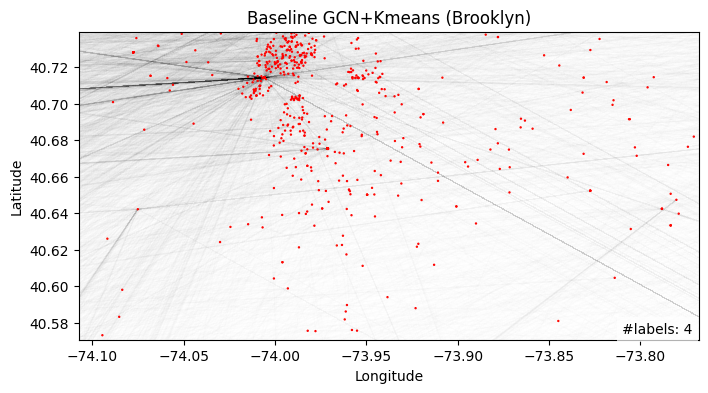

In [6]:
plot_graph(gcn_nodes, gcn_edges, 'Baseline GCN+Kmeans')
plot_graph(gcn_nodes, gcn_edges, 'Baseline GCN+Kmeans (US)', xlim=(-130, -60), ylim=(20, 50))
plot_graph(gcn_nodes, gcn_edges, 'Baseline GCN+Kmeans (New York)', xlim=(-74.2591, -73.7004), ylim=(40.4774, 40.9176))
plot_graph(gcn_nodes, gcn_edges, 'Baseline GCN+Kmeans (Brooklyn)', xlim=(-74.0419, -73.8334), ylim=(40.5707, 40.7394))

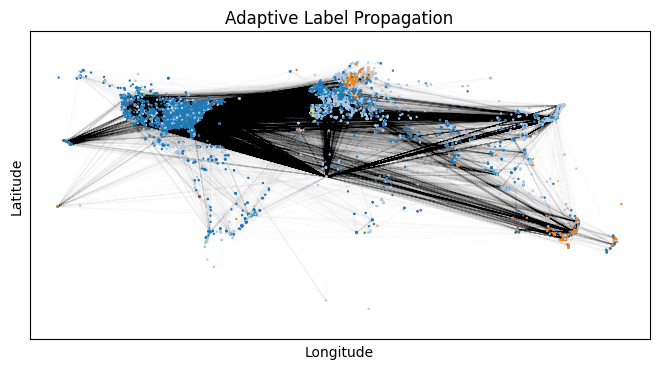

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


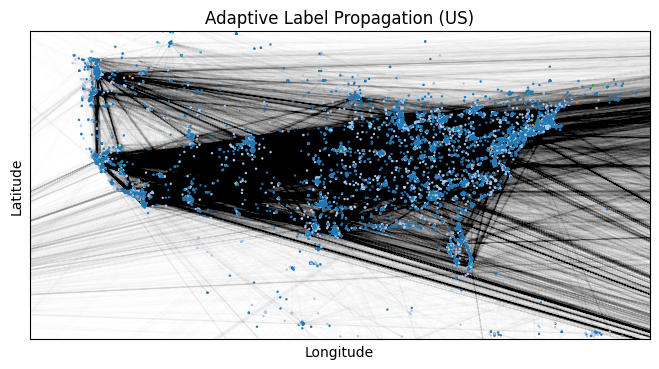

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


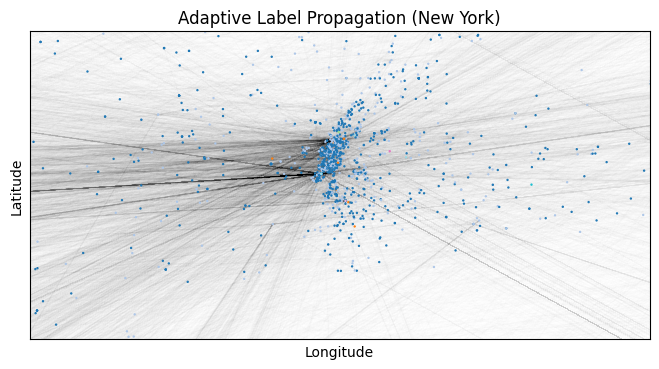

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


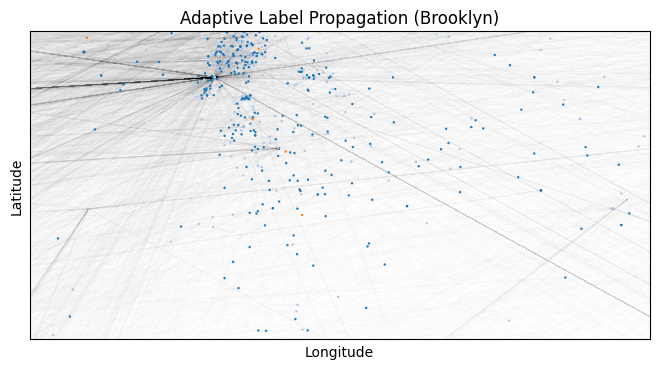

In [ ]:
plot_graph(adaptive_lp_nodes, adaptive_lp_edges, 'Adaptive Label Propagation')
plot_graph(adaptive_lp_nodes, adaptive_lp_edges, 'Adaptive Label Propagation (US)', xlim=(-130, -60), ylim=(20, 50))
plot_graph(adaptive_lp_nodes, adaptive_lp_edges, 'Adaptive Label Propagation (New York)', xlim=(-74.2591, -73.7004), ylim=(40.4774, 40.9176))
plot_graph(adaptive_lp_nodes, adaptive_lp_edges, 'Adaptive Label Propagation (Brooklyn)', xlim=(-74.0419, -73.8334), ylim=(40.5707, 40.7394))